# 1. Pre-processing

In [5]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## WVS Dataset

In [22]:
#Reading the WVS .csv file

wvs_data_original = pd.read_csv(f'sample_data/WVS_Cross-National_Wave_7_csv_v5_0.csv',low_memory=False )

In [ ]:
#Basic checks on the original file

unique_values_version = wvs_data_original['B_COUNTRY'].unique()
print(unique_values_version)

#double checking the version of the data-file
unique_values_version = wvs_data_original['version'].unique()
print(unique_values_version)

#A_STUDY == 2 -> WVS study
unique_values_a_study = wvs_data_original['A_STUDY'].unique()
print(unique_values_a_study)

#A_WAVE == 7 -> WVS wave 7 (2017-2022)
unique_values_a_wave = wvs_data_original['A_WAVE'].unique()
print(unique_values_a_wave)

#double checking the duration of the study
unique_values_a_year = wvs_data_original['A_YEAR'].unique()
print(unique_values_a_year)

[ 20  32  36  50  51  68  76 104 124 152 156 158 170 196 203 218 231 276
 300 320 344 360 364 368 392 398 400 404 410 417 422 434 446 458 462 484
 496 504 528 554 558 566 586 604 608 630 642 643 688 702 703 704 716 762
 764 788 792 804 818 826 840 858 862 909]
['5-0-0 (2022-12-23)']
[2]
[7]
[2018 2017 2021 2020 2019 2022]


In [23]:
#Keeping only questions between 177 and 195 and the country code

filtered_columns = wvs_data_original.filter(regex='^(Q17[7-9]|Q18[0-9]|Q19[0-5]|B_COUNTRY)$')

wvs_data_filtered = wvs_data_original[filtered_columns.columns]

In [24]:
#Function to add country names to the df instead of country code

def add_country_names(wvs_df):
    wvs_df_country_names = pd.read_csv('sample_data/country_names.csv')
    country_mapping = dict(zip(wvs_df_country_names['B_COUNTRY'], wvs_df_country_names['StateNme']))
    wvs_df_copy = wvs_df.copy()

    wvs_df_copy['StateNme'] = wvs_df['B_COUNTRY'].map(country_mapping)

    wvs_df_copy = wvs_df_copy.drop(columns=['B_COUNTRY'])

    return wvs_df_copy

In [26]:
#Adding the country names to the df based on B_COUNTRY code

wvs_data_filtered = add_country_names(wvs_df = wvs_data_filtered)

In [27]:
#Removing the records where the country names are not in the country_names.csv (so we end up with 55 countries)

wvs_data_filtered = wvs_data_filtered.dropna(subset=['StateNme'])

In [30]:
#Replacing all occurrences of -1, -2, -4, -5 at the Question columns with 0

values_to_replace = [-1, -2, -4, -5]
q_columns = [col for col in wvs_data_filtered.columns if col.startswith('Q')]

wvs_data_filtered[q_columns] = wvs_data_filtered[q_columns].replace(values_to_replace, 0)

In [31]:
#Calculating the mean value per question per country

country_means = wvs_data_filtered.groupby('StateNme').mean()

country_means.reset_index(inplace=True)

country_means.set_index('StateNme', inplace=True)

In [32]:
#Replacing Q177 to Q195 with the moral question

column_mapping = {
    'Q177': 'claiming government benefits to which you are not entitled',
    'Q178': 'avoiding a fare on public transport',
    'Q179': 'stealing property',
    'Q180': 'cheating on taxes',
    'Q181': 'someone accepting a bribe in the course of their duties',
    'Q182': 'homosexuality',
    'Q183': 'prostitution',
    'Q184': 'abortion',
    'Q185': 'divorce',
    'Q186': 'sex before marriage',
    'Q187': 'suicide',
    'Q188': 'euthanasia',
    'Q189': 'for a man to beat his wife',
    'Q190': 'parents beating children',
    'Q191': 'violence against other people',
    'Q192': 'terrorism as a political, ideological or religious mean',
    'Q193': 'having casual sex',
    'Q194': 'political violence',
    'Q195': 'death penalty'
}

country_means.rename(columns=column_mapping, inplace=True)

In [39]:
#Normalizing the values between -1 and 1 and then rounding to 4 decimal digits

def custom_scale(value):
    return ((value/5) -1)

country_means_normalized_df = country_means.applymap(custom_scale)

WVS_preprocessed_df = country_means_normalized_df.round(4)

# WVS_preprocessed_df.head(5)

,claiming government benefits to which you are not entitled,avoiding a fare on public transport,stealing property,cheating on taxes,someone accepting a bribe in the course of their duties,homosexuality,prostitution,abortion,divorce,sex before marriage,suicide,euthanasia,for a man to beat his wife,parents beating children,violence against other people,"terrorism as a political, ideological or religious mean",having casual sex,political violence,death penalty
StateNme,,,,,,,,,,,,,,,,,,,
Andorra,-0.6030,-0.6231,-0.6992,-0.6657,-0.7396,0.5970,-0.0606,0.2088,0.6422,0.6253,-0.2753,0.2237,-0.7600,-0.6622,-0.7412,-0.7761,0.1291,-0.7333,-0.3227
Argentina,-0.1117,-0.3998,-0.6610,-0.5795,-0.6297,0.0774,-0.2818,-0.3109,0.2345,0.2618,-0.5041,-0.3300,-0.7137,-0.6142,-0.6586,-0.6853,-0.0217,-0.6409,-0.3509
Armenia,-0.6316,-0.7202,-0.7737,-0.6688,-0.7454,-0.7279,-0.7303,-0.5146,-0.2872,-0.5097,-0.7385,-0.5264,-0.7516,-0.6193,-0.7470,-0.7560,-0.6667,-0.7661,-0.4723
Australia,-0.6475,-0.5647,-0.7227,-0.6347,-0.7162,0.4335,0.0073,0.2835,0.5101,0.5308,-0.2119,0.3016,-0.7549,-0.6823,-0.6853,-0.7391,0.1836,-0.6634,-0.1241
Bangladesh,-0.5952,-0.6398,-0.6892,-0.6598,-0.6785,-0.6625,-0.6800,-0.5957,-0.5660,-0.6990,-0.6200,-0.4445,-0.6170,-0.5688,-0.6412,-0.6410,-0.7023,-0.6498,-0.4495
Bolivia,-0.0370,-0.2198,-0.6897,-0.5978,-0.5978,-0.3994,-0.4680,-0.5527,-0.2209,-0.2667,-0.5799,-0.4898,-0.6521,-0.4833,-0.6038,-0.6386,-0.5037,-0.5998,-0.2924
Brazil,-0.5277,-0.3150,-0.7011,-0.4192,-0.6915,-0.1544,-0.4145,-0.5229,0.1857,0.0944,-0.6085,-0.4140,-0.7292,-0.1396,-0.6563,-0.7104,-0.1958,-0.6767,-0.2141
Canada,-0.5328,-0.3337,-0.5614,-0.4831,-0.5516,0.5498,-0.0046,0.3480,0.4529,0.5672,-0.1660,0.2464,-0.6739,-0.5791,-0.5155,-0.6309,0.3578,-0.4921,-0.0322
Chile,-0.1296,-0.3826,-0.6016,-0.5226,-0.5512,-0.0078,-0.3332,-0.2540,0.2454,0.2304,-0.3974,-0.2134,-0.6360,-0.6008,-0.5962,-0.5958,-0.1576,-0.5376,-0.1742


## PEW Dataset

In [6]:
#Reading the PEW_13 .sav file

pew_data_original = pd.read_spss('sample_data/Pew Research Global Attitudes Project Spring 2013 Dataset for web.sav')

In [8]:
#Keeping only questions between Q84A and Q84H and the country code

filtered_columns = pew_data_original.filter(regex='^Q84[A-H]|COUNTRY')

pew_data_filtered = pew_data_original[filtered_columns.columns]

In [10]:
#Replacing string values with numeric values

replace_map = {'Morally acceptable': 1,
               'Not a moral issue': 0,
               'Morally unacceptable': -1,
               'Depends on situation (Volunteered)': 0,
               'Refused': 0,
               "Don't know": 0}

pew_data_filtered.replace(replace_map, inplace=True)

#Converting all columns (except 'country') to numeric
for col in pew_data_filtered.columns[1:]:
    pew_data_filtered[col] = pd.to_numeric(pew_data_filtered[col])

<ipython-input-10-448e4b521a16>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pew_data_filtered.replace(replace_map, inplace=True)
<ipython-input-10-448e4b521a16>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pew_data_filtered[col] = pd.to_numeric(pew_data_filtered[col])


In [11]:
#Calculating the mean value per question per country

country_means = pew_data_filtered.groupby('COUNTRY').mean()

country_means.reset_index(inplace=True)

country_means.set_index('COUNTRY', inplace=True)

# print(country_means)

                             Q84A      Q84B      Q84C      Q84D      Q84E  \
COUNTRY                                                                     
Argentina                0.632479  0.438339 -0.382173  0.201465 -0.136752   
Australia                0.567500  0.402500  0.080000  0.172500  0.300000   
Bolivia                  0.391250 -0.188750 -0.770000 -0.198750 -0.572500   
Brazil                   0.709375  0.375000 -0.723958  0.052083 -0.175000   
Britain                  0.597826  0.328063  0.018775  0.174901  0.292490   
Canada                   0.455064  0.275321  0.011412  0.141227  0.218260   
Chile                    0.707500  0.500000 -0.452500  0.152500 -0.015000   
China                    0.359268  0.199318 -0.072846 -0.472412 -0.287663   
Czech Republic           0.718571  0.494286  0.308571  0.422857  0.240000   
Egypt                    0.283000  0.442000 -0.571000 -0.936000 -0.707000   
El Salvador              0.420455 -0.175505 -0.834596 -0.535354 -0.714646   

In [13]:
#Replacing Q84A to Q84H with the moral question and rounding to 4 decimal places

column_mapping = {
    'Q84A': 'using contraceptives',
    'Q84B': 'getting a divorce',
    'Q84C': 'having an abortion',
    'Q84D': 'homosexuality',
    'Q84E': 'drinking alcohol',
    'Q84F': 'married people having an affair',
    'Q84G': 'gambling',
    'Q84H': 'sex between unmarried adults'
}

country_means.rename(columns=column_mapping, inplace=True)

PEW_preprocessed_df = country_means.round(4)

# 2. EDA

## WVS Dataset

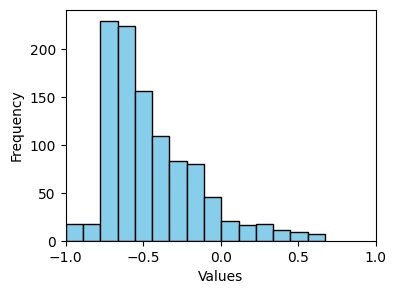

In [40]:
#Creating a histogram for the aggregated and normalized values (final values)

all_values = WVS_preprocessed_df.values.flatten()

plt.figure(figsize=(4, 3))
plt.hist(all_values, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(-1, 1)
plt.show()

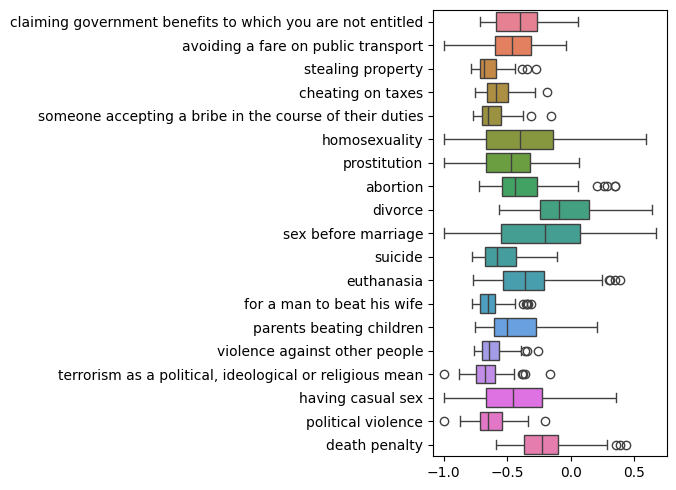

In [36]:
#Creating a boxplot to compare the final values between topics

plt.figure(figsize=(7, 5))
sns.boxplot(data=WVS_preprocessed_df, orient='h')

plt.tight_layout()
plt.show()

## PEW Dataset

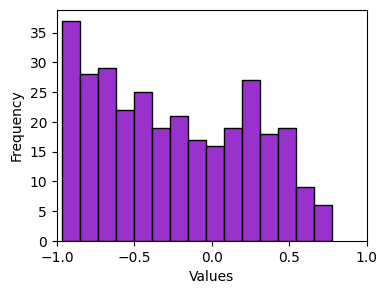

In [16]:
#Creating a histogram for the values

all_values = PEW_preprocessed_df.values.flatten()

plt.figure(figsize=(4, 3))
plt.hist(all_values, bins=15, color='darkorchid', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(-1, 1)
plt.show()

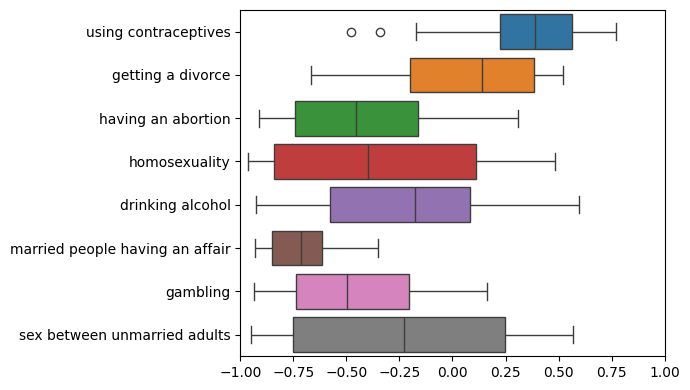

In [21]:
#Creating a boxplot to compare values between topics

plt.figure(figsize=(7, 4))
sns.boxplot(data=PEW_preprocessed_df, orient='h')
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()